In [1]:
from model import *
import numpy as np
from util import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram


(1600, 100)


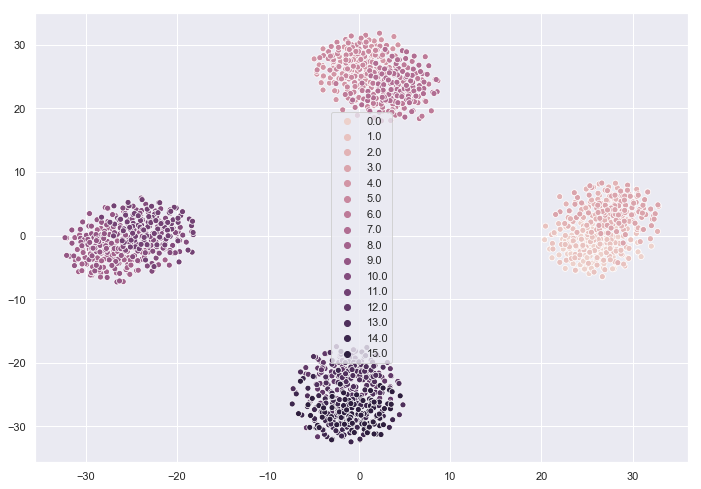

In [3]:
synthetic_tSNE(16,8,1)

In [20]:
def create_data_loader(size = 400, n_class = 16, margin = 8, var = 1, dim = 100, num_per_class = 2000):
    num_batch = n_class * num_per_class // size
    synthetic_data, cla = gen_synthetic(dim, margin, n_class, var, num_per_class)
    train_loader = []
    perm = np.random.permutation(n_class * num_per_class)
    synthetic_data = synthetic_data[perm]
    cla = cla[perm]
    for i in range(size):    
        train_loader.append(torch.from_numpy(synthetic_data[i*num_batch:(i+1)*num_batch]).float())
    return train_loader, synthetic_data, cla

In [21]:
N_CLASS = 16
MARGIN = 8
VAR = 1
DIM = 100

train_loaderm, synthetic_data, cla = create_data_loader(400, N_CLASS,MARGIN,VAR,DIM,2000)

(32000, 100)


In [9]:
HID_DIM = 10

model = VaDE(N_CLASS, HID_DIM, DIM)
model.pre_train(train_loader,pre_epoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Pretraining......


 10%|█         | 1/10 [00:01<00:09,  1.09s/it]

L2=1.1708


 20%|██        | 2/10 [00:01<00:08,  1.03s/it]

L2=1.0086


 30%|███       | 3/10 [00:02<00:06,  1.01it/s]

L2=0.9602


 40%|████      | 4/10 [00:03<00:05,  1.01it/s]

L2=0.9411


 50%|█████     | 5/10 [00:04<00:04,  1.01it/s]

L2=0.9337


 60%|██████    | 6/10 [00:05<00:03,  1.00it/s]

L2=0.9268


 70%|███████   | 7/10 [00:06<00:03,  1.01s/it]

L2=0.9227


 80%|████████  | 8/10 [00:07<00:02,  1.02s/it]

L2=0.9212


 90%|█████████ | 9/10 [00:08<00:01,  1.01s/it]

L2=0.9131


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


L2=0.9105


In [11]:
SUBSAMPLE_SIZE = 100

subsample_index = np.arange(100)
for i in range(1, N_CLASS):
    subsample_index = np.concatenate([subsample_index, i * 2000 + np.arange(SUBSAMPLE_SIZE)])

opti=Adam(model.parameters(),lr=2e-4)


epoch_bar=tqdm(range(50))

tsne=TSNE()

for epoch in epoch_bar:

    L=0
    for x in train_loader:

        loss=model.ELBO_Loss(x)

        opti.zero_grad()
        loss.backward()
        opti.step()

        L+=loss.detach().numpy()
    print(L/len(train_loader))
    #print(evaluate(model, synthetic_data[subsample_index], cla[subsample_index]))


  2%|▏         | 1/50 [00:03<02:33,  3.12s/it]

104.69883317947388



  4%|▍         | 2/50 [00:06<02:30,  3.13s/it]

102.74537414550781



  6%|▌         | 3/50 [00:09<02:28,  3.16s/it]

101.8467935180664



  8%|▊         | 4/50 [00:12<02:26,  3.19s/it]

101.13871910095214



 10%|█         | 5/50 [00:15<02:22,  3.18s/it]

100.52593925476074



 12%|█▏        | 6/50 [00:19<02:20,  3.19s/it]

99.95023235321045



 14%|█▍        | 7/50 [00:22<02:18,  3.22s/it]

99.44461336135865



 16%|█▌        | 8/50 [00:25<02:16,  3.25s/it]

98.92904624938964



 18%|█▊        | 9/50 [00:28<02:13,  3.25s/it]

98.43901411056518



 20%|██        | 10/50 [00:32<02:10,  3.26s/it]

97.93695281982421



 22%|██▏       | 11/50 [00:35<02:07,  3.26s/it]

97.45023374557495



 24%|██▍       | 12/50 [00:38<02:03,  3.24s/it]

96.9519160079956



 26%|██▌       | 13/50 [00:41<02:00,  3.25s/it]

96.46032657623292



 28%|██▊       | 14/50 [00:45<01:57,  3.25s/it]

95.96680139541625



 30%|███       | 15/50 [00:48<01:53,  3.25s/it]

95.50151624679566



 32%|███▏      | 16/50 [00:51<01:50,  3.25s/it]

95.01948379516601



 34%|███▍      | 17/50 [00:55<01:47,  3.26s/it]

94.55049083709717



 36%|███▌      | 18/50 [00:58<01:44,  3.27s/it]

94.07926746368408



 38%|███▊      | 19/50 [01:01<01:42,  3.31s/it]

93.64410808563233



 40%|████      | 20/50 [01:04<01:38,  3.30s/it]

93.20598155975341



 42%|████▏     | 21/50 [01:08<01:37,  3.36s/it]

92.75517917633057



 44%|████▍     | 22/50 [01:12<01:41,  3.62s/it]

92.31988721847534



 46%|████▌     | 23/50 [01:17<01:45,  3.89s/it]

91.89456394195557



 48%|████▊     | 24/50 [01:21<01:42,  3.96s/it]

91.46381065368652



 50%|█████     | 25/50 [01:25<01:38,  3.93s/it]

91.04061332702636



 52%|█████▏    | 26/50 [01:28<01:31,  3.83s/it]

90.6212685585022



 54%|█████▍    | 27/50 [01:32<01:26,  3.78s/it]

90.19901473999023



 56%|█████▌    | 28/50 [01:36<01:21,  3.71s/it]

89.80088441848756



 58%|█████▊    | 29/50 [01:39<01:16,  3.63s/it]

89.38278732299804



 60%|██████    | 30/50 [01:42<01:11,  3.59s/it]

88.96217479705811



 62%|██████▏   | 31/50 [01:46<01:08,  3.62s/it]

88.55278650283813



 64%|██████▍   | 32/50 [01:50<01:05,  3.63s/it]

88.1604668045044



 66%|██████▌   | 33/50 [01:54<01:02,  3.66s/it]

87.73502368927002



 68%|██████▊   | 34/50 [01:57<00:59,  3.74s/it]

87.35128091812133



 70%|███████   | 35/50 [02:01<00:56,  3.78s/it]

86.95152185440064



 72%|███████▏  | 36/50 [02:05<00:52,  3.77s/it]

86.54842348098755



 74%|███████▍  | 37/50 [02:09<00:49,  3.78s/it]

86.13892309188843



 76%|███████▌  | 38/50 [02:13<00:45,  3.77s/it]

85.74660776138306



 78%|███████▊  | 39/50 [02:17<00:42,  3.83s/it]

85.33600761413574



 80%|████████  | 40/50 [02:21<00:38,  3.90s/it]

84.97560186386109



 82%|████████▏ | 41/50 [02:25<00:35,  3.91s/it]

84.55715717315674



 84%|████████▍ | 42/50 [02:28<00:30,  3.86s/it]

84.17768558502198



 86%|████████▌ | 43/50 [02:32<00:26,  3.82s/it]

83.77390975952149



 88%|████████▊ | 44/50 [02:36<00:22,  3.82s/it]

83.39411470413208



 90%|█████████ | 45/50 [02:40<00:19,  3.84s/it]

82.99813737869263



 92%|█████████▏| 46/50 [02:44<00:15,  3.85s/it]

82.6156526184082



 94%|█████████▍| 47/50 [02:47<00:11,  3.79s/it]

82.22400344848633



 96%|█████████▌| 48/50 [02:51<00:07,  3.72s/it]

81.84952962875366



 98%|█████████▊| 49/50 [02:55<00:03,  3.71s/it]

81.47304191589356



100%|██████████| 50/50 [02:59<00:00,  3.58s/it]

81.07460777282715


In [12]:
torch.save(model.state_dict(), "VaDE_parameters.pth")
#model.load_state_dict(torch.load("VaDE_parameters.pth"))

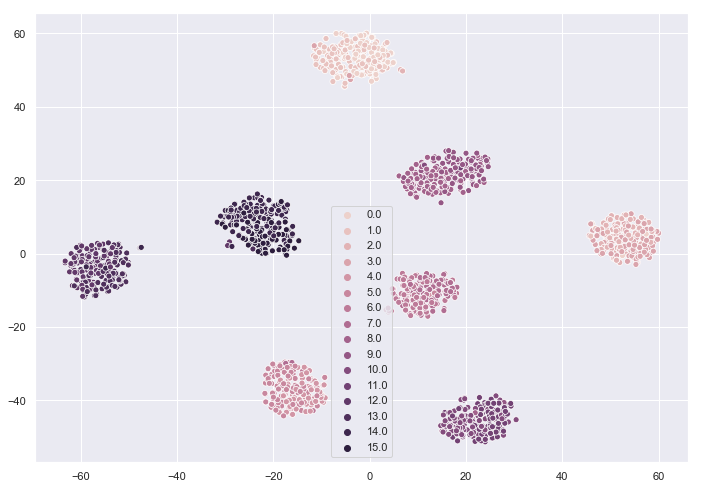

Dendrogram Purity: 0.6084007173603517


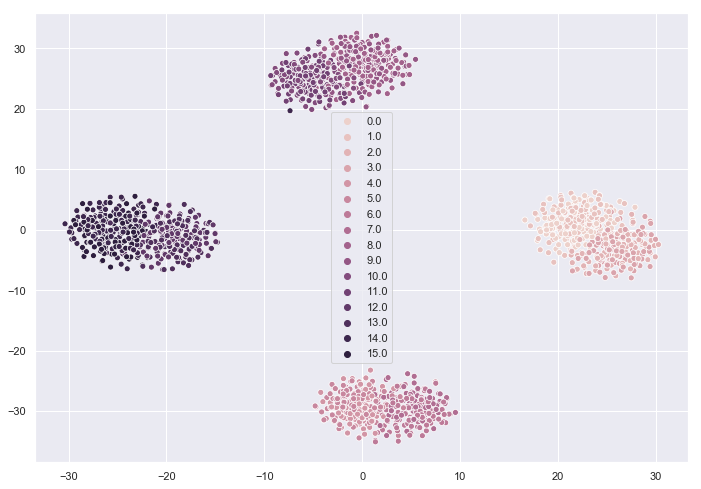

Dendrogram Purity: 0.44166009541186835


ValueError: arrays must all be same length

In [41]:
mean, _ = model.encoder(torch.from_numpy(synthetic_data).float())
z = TSNE(n_components=2).fit_transform(mean.detach().numpy()[subsample_index])
if N_CLASS <= 10:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  palette = sns.color_palette("Paired", N_CLASS),  legend = "full")
else:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  legend = "full")
plt.show()
Z_vade = linkage(mean.detach().numpy()[subsample_index], "ward")
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_vade, rd=True)
print("Dendrogram Purity:", compute_purity(Z_vade, cla[subsample_index], N_CLASS))
z = TSNE(n_components=2).fit_transform(synthetic_data[subsample_index])
if N_CLASS <= 10:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  palette = sns.color_palette("Paired", N_CLASS),  legend = "full")
else:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  legend = "full")
plt.show()
Z_normal = linkage(synthetic_data[subsample_index], "ward")

rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_normal, rd=True)
print("Dendrogram Purity:", compute_purity(Z_normal, cla[subsample_index], N_CLASS))

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
projection = pca.fit_transform(synthetic_data)
z = TSNE(n_components=2).fit_transform(projection)

if N_CLASS <= 10:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  palette = sns.color_palette("Paired",N_CLASS),  legend = "full")
else:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  legend = "full")
plt.show()
Z_pca = linkage(projection[subsample_index], "ward")

rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_pca, rd=True)
print("Dendrogram Purity:", compute_purity(Z_pca, cla[subsample_index], N_CLASS))

In [35]:
#pred = model.predict(torch.from_numpy(synthetic_data[subsample_index]).float())
model.pi_
#z = TSNE(n_components=2).fit_transform(model.mu_c.detach())
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.scatterplot(z[:, 0], z[:, 1], hue = np.arange(16),  legend = "full")

Parameter containing:
tensor([-1.0080e-03,  3.3466e+00,  3.4247e+00,  3.3793e+00,  2.9629e+00,
         2.5879e-01,  3.1915e+00,  3.2709e+00,  3.3854e+00,  3.4336e+00,
         3.3695e+00,  3.1251e+00, -9.0080e-04,  2.0802e-01,  3.1913e+00,
        -1.5232e-03], requires_grad=True)

In [36]:
z_mu, z_sigma2_log = model.encoder(torch.from_numpy(synthetic_data[subsample_index]).float())
#z = torch.randn_like(z_mu) * torch.exp(z_sigma2_log / 2) + z_mu
z = z_mu
pi = model.pi_
log_sigma2_c = model.log_sigma2_c
mu_c = model.mu_c
yita_c = torch.exp(torch.log(pi.unsqueeze(0))+model.gaussian_pdfs_log(z,mu_c,log_sigma2_c))

yita=yita_c.detach().cpu().numpy()
np.argmax(yita,axis=1)[500:600]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

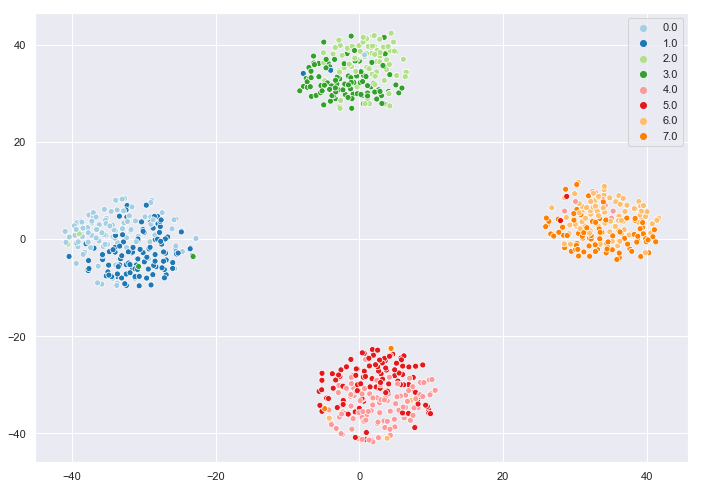

In [271]:
pred = model.predict(torch.from_numpy(synthetic_data[subsample_index]).float())
prediction_mean = model.mu_c[pred]
scaled_mean = prediction_mean * 20 + (mean[subsample_index] - prediction_mean)

z = TSNE(n_components=2).fit_transform(scaled_mean.detach().numpy())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  palette = sns.color_palette("Paired", 8),  legend = "full")
plt.show()

In [26]:
#subsample_inde = np.arange(800)
method = "complete"
Z_vade = linkage(mean.detach().numpy()[subsample_index], method)
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_vade, rd=True)
print("Dendrogram Purity:", compute_purity(Z_vade, cla[subsample_index], N_CLASS))
Z_pca = linkage(projection, method)
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_pca, rd=True)
print("Dendrogram Purity:", compute_purity(Z_pca, cla[subsample_index], N_CLASS))
Z_normal = linkage(synthetic_data[subsample_index], method)
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_normal, rd=True)
print("Dendrogram Purity:", compute_purity(Z_normal, cla[subsample_index], N_CLASS))

Dendrogram Purity: 0.5693808841595025
Dendrogram Purity: 0.5116231493791318
Dendrogram Purity: 0.3796882294836047


In [25]:
def evaluate(model, test_data, cla):
    mean, _ = model.encoder(torch.from_numpy(test_data).float())
    Z_vade = linkage(mean.detach().numpy(), "ward")
    rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_vade, rd=True)
    return compute_objective_plus(len(test_data), rootnode, cla)
    #return compute_purity(Z_vade, cla, 8)
    
Z = linkage(cla[subsample_index].reshape(-1,1), "ward")
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
max = compute_objective_gt(N_CLASS * SUBSAMPLE_SIZE, rootnode, cla[subsample_index])
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_vade, rd=True)
print("VaDE:", compute_objective_gt(N_CLASS * SUBSAMPLE_SIZE, rootnode, cla[subsample_index]) / max)
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_normal, rd=True)
print("Origin", compute_objective_gt(N_CLASS * SUBSAMPLE_SIZE, rootnode, cla[subsample_index]) / max)
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_pca, rd=True)
print("PCA:", compute_objective_gt(N_CLASS * SUBSAMPLE_SIZE, rootnode, cla[subsample_index]) / max)

VaDE: 0.9572904034959444
Origin 0.9224229425984216
PCA: 0.9445804597429647


In [45]:
# evaluation:
def compute_purity_average(model, data, cla, num = 1024, repeat = 50, method = "ward"):
    purity = []
    for i in range(repeat):
        if i % 10 == 0:
            print("{:4.2f}% finished".format(i/repeat * 100))
        index = np.random.choice(np.arange(len(data)), num)
        Z = linkage(data[index], method)
        rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
        purity.append(compute_purity(Z, cla[index], N_CLASS))
    purity = np.array(purity)
    return np.mean(purity), np.std(purity)

print("VaDE:", compute_purity_average(model, mean.detach().numpy(), cla, 1024, 100))
print("PCA:", compute_purity_average(model, projection, cla, 1024, 100))
print("Origin:", compute_purity_average(model, synthetic_data, cla, 1024, 100))

0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
VaDE: (0.6117130756017974, 0.017935651754962065)
0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
PCA: (0.5884021486868084, 0.0153381299048825)
0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
Origin: (0.4450375883774903, 0.011391303055173852)


In [50]:
def compute_MW_objective_average(model, data, cla, num = 1024, repeat = 50, method = "ward"):
    MW = []
    for i in range(repeat):
        if i % 10 == 0:
            print("{:4.2f}% finished".format(i/repeat * 100))
        index = np.random.choice(np.arange(len(data)), num)
        Z = linkage(cla[index].reshape(-1,1), method)
        rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
        max = compute_objective_gt(num, rootnode, cla[index])
        Z = linkage(data[index], method)
        rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
        MW.append(compute_objective_gt(num, rootnode, cla[index]) / max)
    MW = np.array(MW)
    return np.mean(MW), np.std(MW)
print(compute_MW_objective_average(model, mean.detach().numpy(), cla, 1024, 100))
print(compute_MW_objective_average(model, projection, cla, 1024, 100))
print(compute_MW_objective_average(model, synthetic_data, cla, 1024, 100))

0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
(0.9571890821567512, 0.0022985370695094895)
0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
(0.9494376501223539, 0.0037426910692104328)
0.00% finished
10.00% finished
20.00% finished
30.00% finished
40.00% finished
50.00% finished
60.00% finished
70.00% finished
80.00% finished
90.00% finished
(0.9201367175556635, 0.0035052007414895525)


In [27]:
def compute_class_dist(xi, xj):
    dist = 0
    for item_x in xi:
        for item_y in xj:
            dist += np.linalg.norm(item_x - item_y)
    return dist / (len(xi) * len(xj))

def compute_pairwise_dist(data, cla, k, num):
    distance_dict = []
    for i in range(k):
        index1 = np.where(cla == i)
        dist_k = []
        for j in range(k):
            index2 = np.where(cla == j)
            dist_k.append(compute_class_dist(data[index1],data[index2]))
        distance_dict.append(dist_k)
    return np.array(distance_dict)
matrix_vade = compute_pairwise_dist(mean.detach().numpy()[subsample_index], cla[subsample_index],  N_CLASS, SUBSAMPLE_SIZE)
matrix_origin = compute_pairwise_dist(synthetic_data[subsample_index], cla[subsample_index] , N_CLASS, SUBSAMPLE_SIZE)
matrix_pca = compute_pairwise_dist(projection, cla[subsample_index] , N_CLASS, SUBSAMPLE_SIZE)

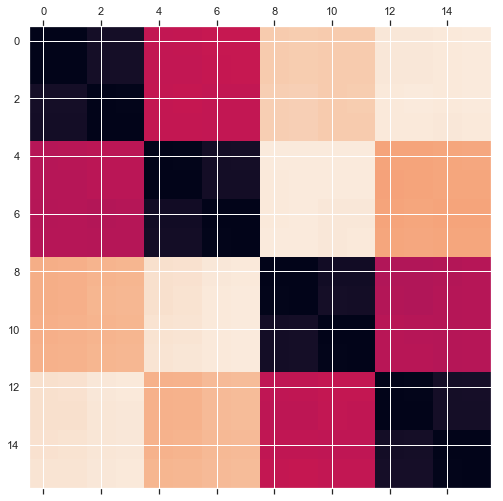

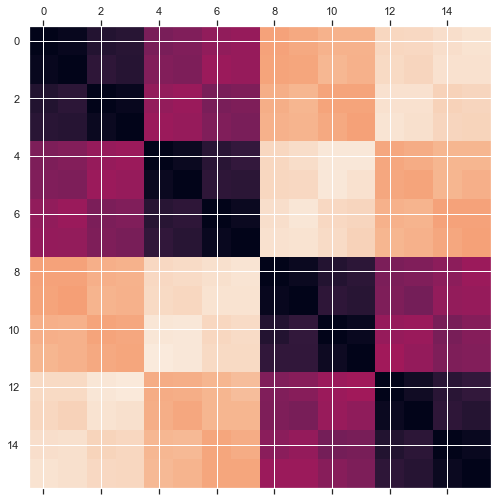

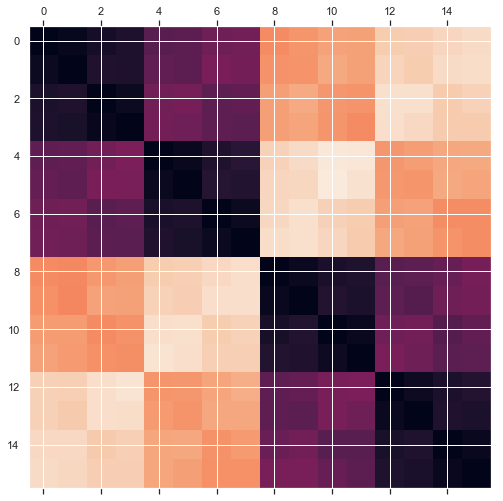

IndexError: index 8 is out of bounds for axis 0 with size 8

In [28]:
for i in range(N_CLASS):
    matrix_vade[i] = (matrix_vade[i] - np.min(matrix_vade[i]))/np.max(matrix_vade[i])
    matrix_pca[i] = (matrix_pca[i] - np.min(matrix_pca[i]))/np.max(matrix_pca[i])
    matrix_origin[i] = (matrix_origin[i] - np.min(matrix_origin[i]))/np.max(matrix_origin[i])

plt.matshow(matrix_vade)
plt.show()

plt.matshow(matrix_pca)
plt.show()

plt.matshow(matrix_origin)
plt.show()

h_mean = HGMM(8, 4, 4)
matrix_mean = compute_pairwise_dist(h_mean, np.arange(N_CLASS), N_CLASS, 1)
plt.matshow(matrix_mean)
plt.show()

In [153]:
print(matrix_vade)
print(matrix_pca)
print(matrix_origin)
print(matrix_mean)
print(h_mean)

[[0.00000000e+00 9.41272442e-03 1.13467338e-01 1.17488018e-01
  9.03730884e-01 9.05069532e-01 9.20026728e-01 9.18882461e-01]
 [3.60126271e-03 0.00000000e+00 1.02347486e-01 1.01010219e-01
  8.99691806e-01 9.00094504e-01 9.14097387e-01 9.12025464e-01]
 [1.17677401e-01 1.12146651e-01 0.00000000e+00 4.68035191e-03
  9.19012433e-01 9.20953525e-01 9.02266908e-01 9.03112342e-01]
 [1.25494256e-01 1.14540449e-01 8.66467026e-03 0.00000000e+00
  9.24158877e-01 9.25121182e-01 9.06992944e-01 9.06772343e-01]
 [9.05652976e-01 9.06254487e-01 9.03314201e-01 9.06481511e-01
  0.00000000e+00 5.54352914e-04 1.10975255e-01 1.07253757e-01]
 [9.17848397e-01 9.17499040e-01 9.16090326e-01 9.18280052e-01
  1.22623675e-02 0.00000000e+00 1.26113252e-01 1.16011235e-01]
 [9.18477166e-01 9.17160130e-01 8.83412704e-01 8.86080550e-01
  1.19805320e-01 1.23290173e-01 0.00000000e+00 1.41252245e-02]
 [9.06069987e-01 9.03825455e-01 8.72943210e-01 8.74564191e-01
  1.03960692e-01 1.01151002e-01 1.82761700e-03 0.00000000e+00]]

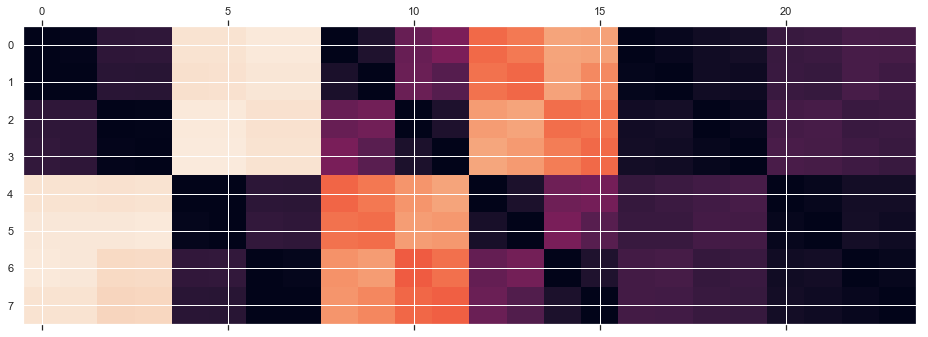

In [168]:
from matplotlib import cm
plt.matshow(np.concatenate([matrix_vade,matrix_pca, matrix_origin], axis = 1))

In [ ]:
Z_normal = linkage(synthetic_data[subsample_index], "ward")
print("Dendrogram Purity:", compute_purity(Z_normal, cla[subsample_index], 8))

In [ ]:
gmm = GaussianMixture(n_components=8, covariance_type='diag')

In [ ]:
gmm.fit(synthetic_data)

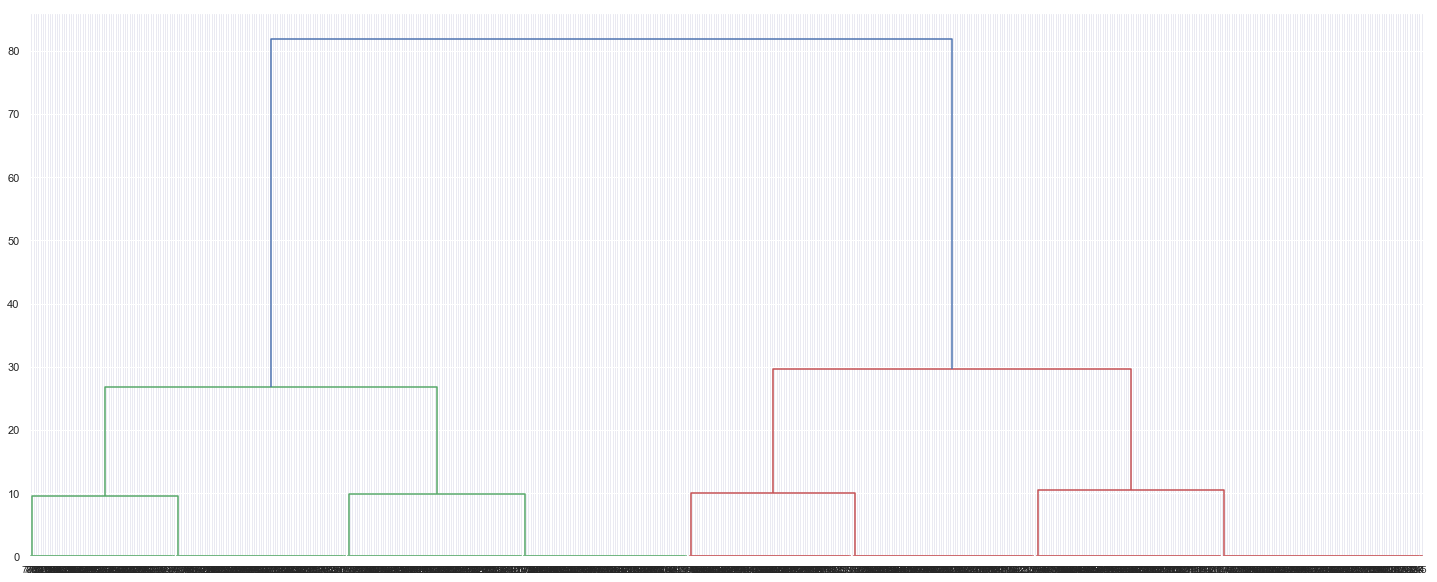

In [18]:
Z = linkage(cla[subsample_index].reshape(-1,1), "ward")
"""
plt.figure(figsize = (25, 10))
d = dendrogram(
            Z,
            leaf_rotation=0.,  # rotates the x axis labels
            leaf_font_size=10.,  # font size for the x axis labels
            get_leaves = True
        )
plt.show()
"""
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
print(compute_objective_gt(800, rootnode, cla[subsample_index]))

Dendrogram Purity: 0.6523185784704227


0.9136090527765948

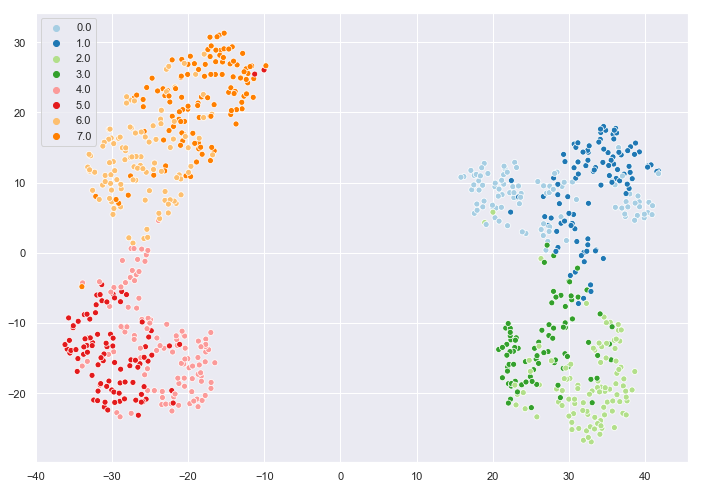

In [46]:
z = TSNE(n_components=2).fit_transform(synthetic_data[subsample_index, :3])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = np.array(cla[subsample_index]),  palette = sns.color_palette("Paired", 8),  legend = "full")
Z_normal = linkage(synthetic_data[subsample_index, :3], "ward")

rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_normal, rd=True)
print("Dendrogram Purity:", compute_purity(Z_normal, cla[subsample_index], 8))
compute_objective_gt(800, rootnode, cla[subsample_index]) / max

In [47]:
Z_pca = linkage(projection, "complete")
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z_pca, rd=True)
compute_objective_gt(800, rootnode, cla[subsample_index]) / max

0.8659166165682273

In [179]:
from scipy.signal import savgol_filter
import pickle
with open("eval_history.pkl", "rb") as f:
    eval_hist = pickle.load(f)
y = [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
loss = []
for item in eval_hist:
    loss.append(item[1])
    #for i in range(10):
        #y[i].append(item[0][str(i)])

In [180]:
for i in range(10):
    yhat = savgol_filter(y[i], 101, 3)
    plt.plot(yhat, label = i)
plt.legend()
plt.show()

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

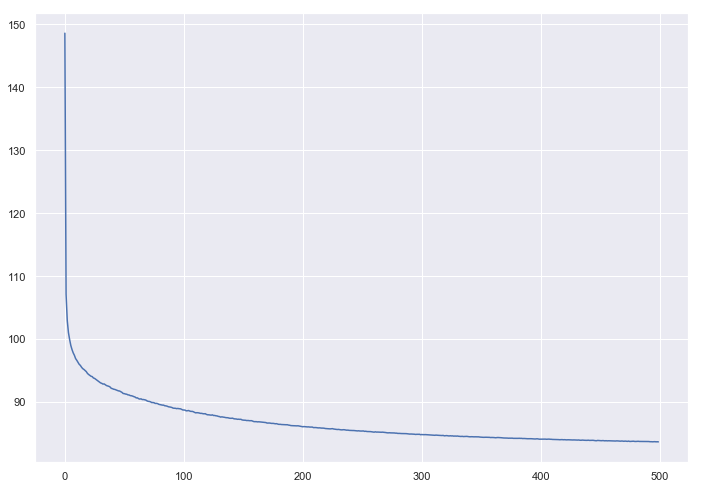

In [149]:
plt.plot(loss)
plt.show()